In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats
#fastly download data from kaggle to google colab,,but if u downloaded in local disk then upload zip
#file(if multiple folders are there) else upload file,,,but uploading takes very long time so,,,we directly did like this
#otherwise upload downloaded dataset on drive and from drive fetch the data(it is also fast)


 98% 1.04G/1.06G [00:09<00:00, 266MB/s]
100% 1.06G/1.06G [00:09<00:00, 122MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
#runtime type-->tpu or gpu,,dont use cpu then it takes more and more time to train,,,bcz i dont have high end gpu thats why i choose google colab
#environment for training the model,,,

Epoch 1/10
625/625 [==============================] - 83s 112ms/step - loss: 1.5844 - accuracy: 0.5654 - val_loss: 0.7131 - val_accuracy: 0.4970
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6232 - accuracy: 0.6558 - val_loss: 1.0316 - val_accuracy: 0.5658
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5427 - accuracy: 0.7226 - val_loss: 0.5370 - val_accuracy: 0.7366
Epoch 4/10
625/625 [==============================] - 71s 113ms/step - loss: 0.4808 - accuracy: 0.7720 - val_loss: 0.6984 - val_accuracy: 0.5214
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4147 - accuracy: 0.8101 - val_loss: 0.6654 - val_accuracy: 0.6696
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3572 - accuracy: 0.8431 - val_loss: 0.6702 - val_accuracy: 0.7102
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2911 - accuracy: 0.8755 - val_loss: 0.7448 - val_ac

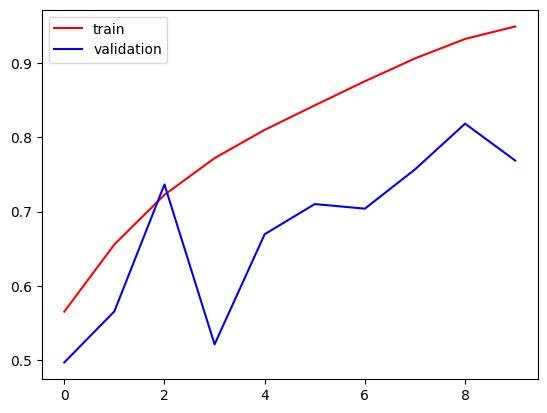

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
#X aixs accuracy  and y axis epochs
#overfitting

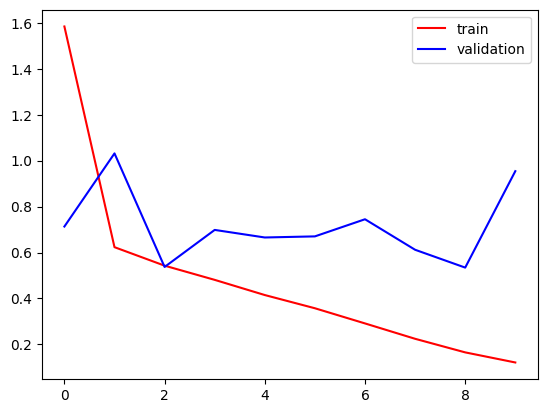

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [15]:
import cv2
#openCV

In [16]:
test_img = cv2.imread('/content/cat.jpg')

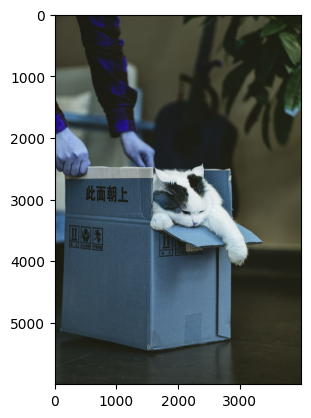

In [17]:
plt.imshow(test_img)

In [18]:
test_img.shape

(6000, 4000, 3)

In [19]:
test_img = cv2.resize(test_img,(256,256))

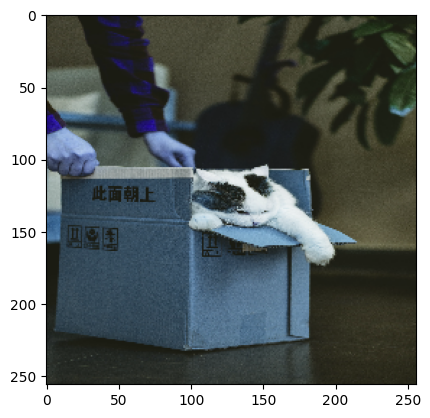

In [22]:
plt.imshow(test_img)

In [20]:
test_input = test_img.reshape((1,256,256,3))#bcz we are giving i/p in batches ,,so we have to give test data in batch
#but we have only 1 image/data so  this code is used

In [21]:
model.predict(test_input)
#as u see wrong predicted
#0 means cat and 1 means dog,,,,bcz in train folder first cat folder is there and then dog folder is there so(first one is 0 and next one is 1)

1/1 [==============================] - 0s 394ms/step


array([[1.]], dtype=float32)

In [25]:
test_img2 = cv2.imread('/content/dog.jpg')

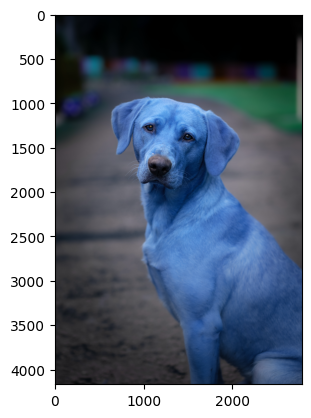

In [26]:
plt.imshow(test_img2)

In [27]:
test_img2=cv2.resize(test_img2,(256,256))

In [28]:
test_img2

array([[[  4,  11,   8],
        [  3,   9,   7],
        [  3,   9,   6],
        ...,
        [  0,   0,   0],
        [  1,   2,   2],
        [  0,   2,   0]],

       [[  6,  11,  10],
        [  3,  10,   7],
        [  4,   9,   7],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  2,   2,   2]],

       [[  7,  12,  13],
        [  6,  11,  10],
        [  5,  10,   9],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       ...,

       [[ 39,  35,  40],
        [ 38,  34,  39],
        [ 38,  34,  39],
        ...,
        [ 58,  77, 112],
        [ 50,  71, 106],
        [ 50,  70, 105]],

       [[ 42,  39,  41],
        [ 39,  35,  40],
        [ 35,  34,  36],
        ...,
        [ 56,  76, 111],
        [ 53,  73, 108],
        [ 53,  73, 108]],

       [[ 37,  36,  38],
        [ 37,  36,  38],
        [ 35,  34,  36],
        ...,
        [ 53,  73, 108],
        [ 60,  79, 112],
        [ 57,  76, 109]]

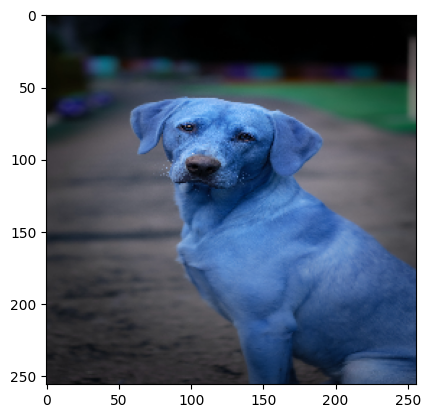

In [30]:
plt.imshow(test_img2)

In [33]:
test_input2=test_img2.reshape((1,256,256,3))

In [34]:
model.predict(test_input2)
#dog classified succefully

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [ ]:
#try to improve accuracy